In [42]:
!pip install pygam --user


In [43]:
!pip install maxentropy


  Using cached maxentropy-0.3.0.tar.gz (47 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [44]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(r'c:\Users\ottok\Downloads\Combined_Themeparks.csv')

# Display the data
print(df)


                   Date                                    Profile  \
0      12/31/23 9:40 PM                 Wild Adventures Theme Park   
1      12/31/23 8:01 PM                           Fun Spot America   
2      12/31/23 7:30 PM                           Fun Spot America   
3      12/31/23 7:00 PM                           Disneyland Paris   
4      12/31/23 7:00 PM                      Silverwood Theme Park   
...                 ...                                        ...   
15438  01/01/2023 02:00                 Wild Adventures Theme Park   
15439  01/01/2023 01:20                                   Playland   
15440  01/01/2023 00:01                           Disneyland Paris   
15441  01/01/2023 00:00  Six Flags Over Georgia & Hurricane Harbor   
15442  01/01/2023 00:00                         Knott's Berry Farm   

                                                 Message  Number of Reactions  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...                 16.0 

In [45]:
null_values_df = pd.DataFrame({
    'Variable Name': df.columns,
    'Null Values': df.isnull().sum()
})

print(null_values_df)


                                             Variable Name  Null Values
Date                                                  Date            0
Profile                                            Profile            0
Message                                            Message            0
Number of Reactions                    Number of Reactions            0
Number of Shares                          Number of Shares        15443
Number of Comments (primary)  Number of Comments (primary)            0
Number of Shares.1                      Number of Shares.1            0
Comments per post                        Comments per post            0
Comments on posts by fans        Comments on posts by fans            0
Post interaction rate                Post interaction rate            0
Engagement                                      Engagement            0
Number of Likes                            Number of Likes            0
Link-posts                                      Link-posts      

In [46]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(message):
    blob = TextBlob(message)
    return blob.sentiment.polarity

# Apply sentiment analysis to the message column
df['Sentiment'] = df['Message'].apply(get_sentiment)

# Display the updated DataFrame
print(df)


                   Date                                    Profile  \
0      12/31/23 9:40 PM                 Wild Adventures Theme Park   
1      12/31/23 8:01 PM                           Fun Spot America   
2      12/31/23 7:30 PM                           Fun Spot America   
3      12/31/23 7:00 PM                           Disneyland Paris   
4      12/31/23 7:00 PM                      Silverwood Theme Park   
...                 ...                                        ...   
15438  01/01/2023 02:00                 Wild Adventures Theme Park   
15439  01/01/2023 01:20                                   Playland   
15440  01/01/2023 00:01                           Disneyland Paris   
15441  01/01/2023 00:00  Six Flags Over Georgia & Hurricane Harbor   
15442  01/01/2023 00:00                         Knott's Berry Farm   

                                                 Message  Number of Reactions  \
0      🎟️🚨 Today's the FINAL day to use your 2023 Sea...                 16.0 

In [47]:
column_names = df.columns
print(column_names)


Index(['Date', 'Profile', 'Message', 'Number of Reactions', 'Number of Shares',
       'Number of Comments (primary)', 'Number of Shares.1',
       'Comments per post', 'Comments on posts by fans',
       'Post interaction rate', 'Engagement', 'Number of Likes', 'Link-posts',
       'Picture Posts', 'Video-posts', 'Profile-ID', 'Post-ID', 'Link',
       'Sentiment'],
      dtype='object')


In [48]:
df[['Message', 'Sentiment', 'Engagement']]


,Message,Sentiment,Engagement
0,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,0.317857,"1,09E+12"
1,See you next year! 😉 Don’t miss...,0.200000,"4,17E+11"
2,Don't miss our HUGE firework display ! 🥳\n\n#f...,0.500000,"2,85E+11"
3,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,0.000000,"1,36E+11"
4,It's the last day of our New Year's Sale! Save...,0.129545,"4,96E+11"
...,...,...,...
15438,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,0.304167,"1,25E+11"
15439,O Grupo Playcenter e os Parques Playcenter Fam...,0.000000,"2,46E+09"
15440,Gelukkig 2023! Laat de magie dit jaar stralen ...,0.000000,"1,75E+12"
15441,What are your 2023 New Years resolutions? ✨\n\...,0.443182,"1,42E+12"


In [49]:
column_dtypes = df.dtypes
print(column_dtypes)


Date                             object
Profile                          object
Message                          object
Number of Reactions             float64
Number of Shares                float64
Number of Comments (primary)    float64
Number of Shares.1              float64
Comments per post               float64
Comments on posts by fans       float64
Post interaction rate            object
Engagement                       object
Number of Likes                 float64
Link-posts                      float64
Picture Posts                   float64
Video-posts                     float64
Profile-ID                       object
Post-ID                          object
Link                             object
Sentiment                       float64
dtype: object


In [50]:
# Remove the comma from the string and convert it to a float
df['Engagement'] = df['Engagement'].str.replace(',', '.').astype(float)



In [51]:
negative_sentiments = df[df['Sentiment'] < 0]
if not negative_sentiments.empty:
    print("There are negative values in the sentiment column.")
else:
    print("There are no negative values in the sentiment column.")


There are negative values in the sentiment column.


In [52]:
negative_count = negative_sentiments[negative_sentiments['Sentiment'] < 0]['Sentiment'].count()
print(negative_count)


872


In [53]:
# Check for null values in each DataFrame
null_values_df = pd.DataFrame({
    'Variable Name': df.columns,
    'Null Values': df.isnull().sum()
})

print(null_values_df)


                                             Variable Name  Null Values
Date                                                  Date            0
Profile                                            Profile            0
Message                                            Message            0
Number of Reactions                    Number of Reactions            0
Number of Shares                          Number of Shares        15443
Number of Comments (primary)  Number of Comments (primary)            0
Number of Shares.1                      Number of Shares.1            0
Comments per post                        Comments per post            0
Comments on posts by fans        Comments on posts by fans            0
Post interaction rate                Post interaction rate            0
Engagement                                      Engagement            0
Number of Likes                            Number of Likes            0
Link-posts                                      Link-posts      

In [54]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(df['Sentiment'], df['Engagement'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)


Correlation coefficient: 0.03349423097831414
P-value: 3.138804980698981e-05


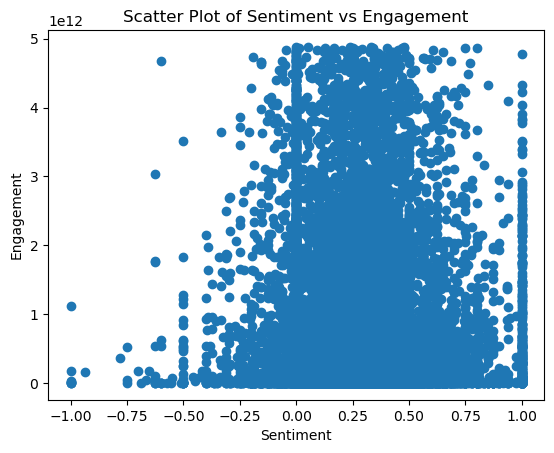

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['Sentiment'], df['Engagement'])
plt.xlabel('Sentiment')
plt.ylabel('Engagement')
plt.title('Scatter Plot of Sentiment vs Engagement')
plt.show()


In [70]:
from scipy.stats import kruskal

# Filter the DataFrame for each sentiment category
neutral_engagement = df[df['Sentiment'] == 0]['Engagement']
positive_engagement = df[df['Sentiment'] > 0]['Engagement']
negative_engagement = df[df['Sentiment'] < 0]['Engagement']

# Run the Kruskal-Wallis test
statistic, p_value = kruskal(neutral_engagement, positive_engagement, negative_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)


Test Statistic: 27.944689959293544
P-value: 8.548455909947135e-07


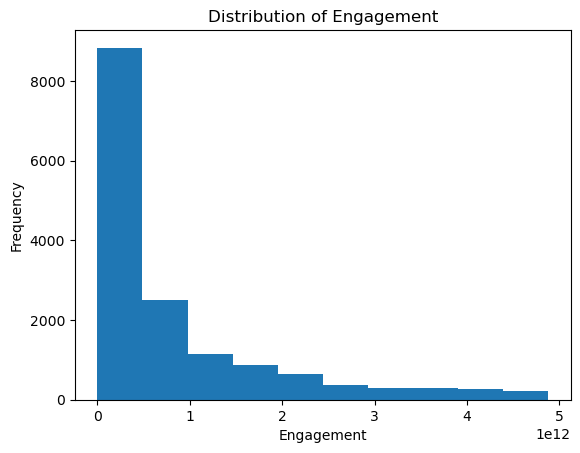

In [57]:
plt.hist(df['Engagement'], bins=10)
plt.xlabel('Engagement')
plt.ylabel('Frequency')
plt.title('Distribution of Engagement')
plt.show()


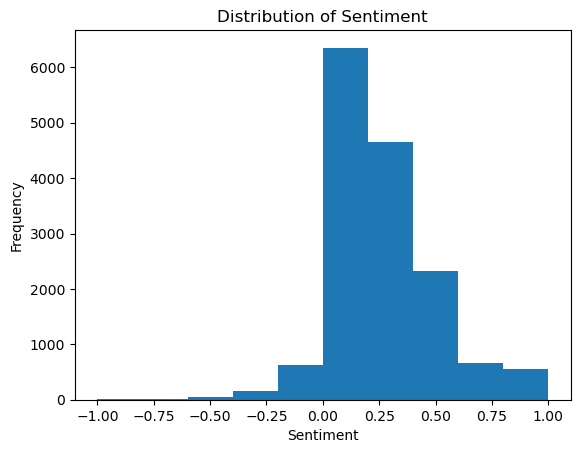

In [58]:
import matplotlib.pyplot as plt

plt.hist(df['Sentiment'], bins=10)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment')
plt.show()


In [61]:
from scipy.stats import mannwhitneyu

# Filter the DataFrame for sentiment with negative scores
negative_engagement = df[df['Sentiment'] < 0]['Engagement']

# Filter the DataFrame for sentiment with positive scores
positive_engagement = df[df['Sentiment'] > 0]['Engagement']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(negative_engagement, positive_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)


Test Statistic: 4621804.0
P-value: 0.16662008574945886


In [62]:
from scipy.stats import mannwhitneyu

# Filter the DataFrame for sentiment with neutral scores
neutral_engagement = df[df['Sentiment'] == 0]['Engagement']

# Filter the DataFrame for sentiment with positive scores
positive_engagement = df[df['Sentiment'] > 0]['Engagement']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(neutral_engagement, positive_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)


Test Statistic: 18824796.5
P-value: 1.5100589881882836e-07


In [67]:
import numpy as np

def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Calculate the Common Language Effect Size
cles = cles_ind(neutral_engagement, positive_engagement)

print("Common Language Effect Size:", cles)

Common Language Effect Size: 0.47081531010692623


In [63]:
from scipy.stats import mannwhitneyu

# Filter the DataFrame for sentiment with neutral scores
neutral_engagement = df[df['Sentiment'] == 0]['Engagement']

# Filter the DataFrame for sentiment with negative scores
negative_engagement = df[df['Sentiment'] < 0]['Engagement']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(neutral_engagement, negative_engagement)

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 1553619.0
P-value: 0.20671624639099362


In [22]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')


In [23]:
df[['Message', 'Sentiment']]

,Message,Sentiment
0,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,positive
1,See you next year! 😉 Don’t miss...,positive
2,Don't miss our HUGE firework display ! 🥳\n\n#f...,positive
3,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,neutral
4,It's the last day of our New Year's Sale! Save...,positive
...,...,...
15438,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,positive
15439,O Grupo Playcenter e os Parques Playcenter Fam...,neutral
15440,Gelukkig 2023! Laat de magie dit jaar stralen ...,neutral
15441,What are your 2023 New Years resolutions? ✨\n\...,positive


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Preprocess the text data
# Add your preprocessing steps here (e.g., removing stopwords, punctuation, etc.)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiment of test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.904823567497572


In [25]:
# Print the predicted labels
print(y_pred)

# Create a DataFrame for easier viewing
results_df = pd.DataFrame({
    'Message': X_test,
    'Predicted Sentiment': y_pred
})

print(results_df)

['positive' 'positive' 'positive' ... 'neutral' 'positive' 'positive']
                                                 Message Predicted Sentiment
150    The holidays can be a bit of a wild ride, and ...            positive
12890  We're seeing green this weekend!\n🍀 Enjoy our ...            positive
5733   Who’s ready for the ultimate BOYBAND experienc...            positive
14078  We're Hiring! 📣 Join us at our Hiring Week eve...             neutral
4764   Are you brave enough? Join us tonight for #Fri...            positive
...                                                  ...                 ...
1731                            Thanksgiving essentials.             neutral
2622   We need YOUR help! WinterFest has been nominat...            positive
11065                     Hump Day \n📷 : @Coaster.stalls             neutral
14883  Celebrate 2023 in style at Local's Night!! 🤩Re...            positive
3643   Ready to Plan Your Ultimate Holiday Celebratio...            positive

[308

In [26]:
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Preprocess the text data
# Add your preprocessing steps here (e.g., removing stopwords, punctuation, etc.)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF or CountVectorizer
# Add your vectorization method here

# Train the Naive Bayes model
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Predict the sentiment of test data
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7381029459371965


In [28]:
# Import the required libraries
from maxentropy import MaxentModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preprocess the text data
# Add your preprocessing steps here (e.g., removing stopwords, punctuation, etc.)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000)  # You can adjust max_features based on your dataset size
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Train the Maxentropy model
maxent_model = MaxentModel()
maxent_model.fit(X_train_counts, y_train)

# Predict the sentiment of test data
y_pred = maxent_model.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.feature_extraction.text import CountVectorizer


ModuleNotFoundError: No module named 'maxentropy'